
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [ ]:
# Set your student number and name
student_number = '401105689'
Name = 'Sana'
Last_Name = 'Babayan'

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X_values = np.random.uniform(range_start, range_end, num_samples)
    y_values = 0.1 * X_values**6 - 2 * X_values**3 + 7 * X_values**2 - 9 * X_values + 3
    noise = np.random.normal(loc=0, scale=noise_std, size=num_samples)
    y_values_with_noise = y_values + noise
    return X_values, y_values_with_noise

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [3]:
from sklearn.model_selection import train_test_split

range_start = -3
range_end = -1
num_samples = 1000
X_values, y_values = generate_dataset(range_start, range_end, num_samples)

X_train, X_test1, y_train, y_test1 = train_test_split(X_values, y_values, test_size=0.2)
X_test2, y_test2 = generate_dataset(4, 6, 200, 5)

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [11]:
class PolynomialRegression():
    def __init__(self, degree, learning_rate=0.05, iterations=500):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None

    def fit(self, X, Y):
        self.coefficients = np.random.randn(self.degree + 1)
        minimum_X = min(X)
        maximum_X = max(X)
        temp_X = X.copy()
        X = (X - maximum_X) / (minimum_X - maximum_X)
        X_poly = np.column_stack([X**i for i in range(0, self.degree + 1)])
        for _ in range(self.iterations):
            predictions = np.dot(X_poly, self.coefficients)
            gradients = np.dot(X_poly.T, predictions - Y) / len(Y)
            self.coefficients = self.coefficients - self.learning_rate * gradients
        for i in range(self.degree + 1):
            self.coefficients[i] /= (minimum_X - maximum_X) ** i
            for j in range(i+1, self.degree + 1):
                self.coefficients[i] += (((-1) ** (j - i)) * self.coefficients[j] * (maximum_X ** (j - i)) * math.comb(j, j - i)) / (minimum_X - maximum_X) ** j
        X = temp_X
        return self

    def predict(self, X):
        poly_for_X = np.column_stack([X**i for i in range(0, self.degree + 1)])
        return np.dot(poly_for_X, self.coefficients)

models = []
for i in range(2, 13):
    model = PolynomialRegression(i, 0.05, 10000)
    model.fit(X_train, y_train)
    models.append(model)

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    mse_results = []
    for model in models:
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_results.append(mse)
    return mse_results

train_error = evaluate_models(models, X_train, y_train)
test1_error = evaluate_models(models, X_test1, y_test1)
test2_error = evaluate_models(models, X_test2, y_test2)
for i in range(0, 11):
    print('polynomial degree =', i+2, ', MSE train =', train_error[i], ', MSE test 1 =', test1_error[i], ', MSE test 2 =', test2_error[i])

polynomial degree = 2 , MSE train = 37.256250667459106 , MSE test 1 = 38.90580568744617 , MSE test 2 = 735809.0409064847
polynomial degree = 3 , MSE train = 26.133839012947227 , MSE test 1 = 25.991920841204898 , MSE test 2 = 16275444.402399821
polynomial degree = 4 , MSE train = 24.286049827857678 , MSE test 1 = 23.151519356510853 , MSE test 2 = 1866072.7390970811
polynomial degree = 5 , MSE train = 24.043569762201724 , MSE test 1 = 22.474161434374572 , MSE test 2 = 42703533.894912094
polynomial degree = 6 , MSE train = 24.056735344698737 , MSE test 1 = 22.30939737033711 , MSE test 2 = 9816255.609138625
polynomial degree = 7 , MSE train = 24.061028817114757 , MSE test 1 = 22.303456679933944 , MSE test 2 = 49773354.869472474
polynomial degree = 8 , MSE train = 24.05398685779114 , MSE test 1 = 22.325735234416832 , MSE test 2 = 209845426.81942993
polynomial degree = 9 , MSE train = 24.040003981727697 , MSE test 1 = 22.360548643295033 , MSE test 2 = 12928887280.750957
polynomial degree = 1

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

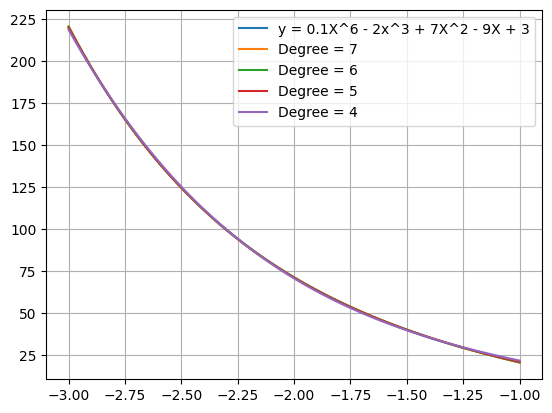

In [16]:
x = np.linspace(-3, -1, 1000)
y = 0.1 * x ** 6 - 2 * x ** 3 + 7 * x ** 2 - 9 * x + 3
plt.plot(x, y, label="y = 0.1X^6 - 2x^3 + 7X^2 - 9X + 3")
plt.plot(x, models[5].predict(x), label="Degree = 7")
plt.plot(x, models[4].predict(x), label="Degree = 6")
plt.plot(x, models[3].predict(x), label="Degree = 5")
plt.plot(x, models[2].predict(x), label="Degree = 4")
plt.grid(True)
plt.legend()
plt.show()

## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

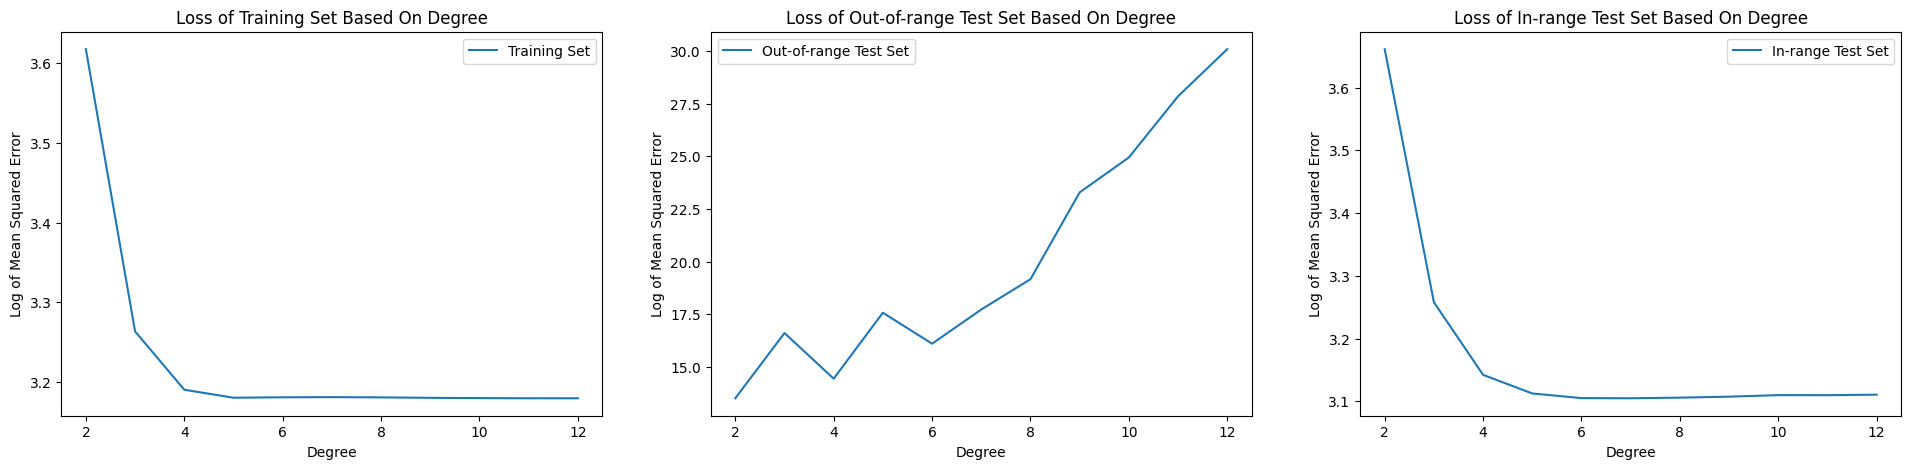

In [21]:
degrees = [i for i in range (2, 13)]
plt.subplot(1, 3, 1)
plt.subplots_adjust(bottom=0.1, right=3.0, top=0.9)
plt.plot(degrees, np.log(train_error), label = "Training Set")
plt.legend()
plt.title("Loss of Training Set Based On Degree")
plt.xlabel("Degree")
plt.ylabel("Log of Mean Squared Error")

plt.subplot(1, 3, 2)
plt.plot(degrees, np.log(test2_error), label="Out-of-range Test Set")
plt.legend()
plt.title("Loss of Out-of-range Test Set Based On Degree")
plt.xlabel("Degree")
plt.ylabel("Log of Mean Squared Error")

plt.subplot(1, 3, 3)
plt.plot(degrees, np.log(test1_error), label= "In-range Test Set")
plt.legend()
plt.title("Loss of In-range Test Set Based On Degree")
plt.xlabel("Degree")
plt.ylabel("Log of Mean Squared Error")

plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?
By having large degree around 12, we will probably face overfitting and our out of range test error will be high beside the low train error witch is due to high variance.On Other hand, low degree results in low variance but high bias causing a high value in both train and test errors. Based on results from this practical, we can conclude choosing degrees around 7 or 6 will probably gives us low value in both train and test errors.